In [1]:
pathtorepo = "C:\\Users\\Alex\\Desktop\\"

using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
include("C:\\Users\\Alex\\Desktop\\dynamical-systems\\system.jl")
include("C:\\Users\\Alex\\Desktop\\dynamical-systems\\visual_regimes.jl");

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems
E, x, y  = -40..40, -5..5,  -5..5
box = E × x × y
using CairoMakie, GLMakie
using LinearAlgebra

In [3]:
const τ = 0.013;  const τD = 0.07993;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const ΔU0 = 0.305; 

In [4]:
time = 1000; tt = 1000; tstep = 0.001; times = [time, tt]
integ_set = (alg = Vern9(), adaptive = false, dt = tstep);

U0 = 0.268371462842221 # 0.265;
I0 = -1.75061296075842 # -1.7064049

Homoclinic destroyed

U0 = 0.2665
I0 = -1.7266
I0 =  -1.7265152 более точная граница

In [984]:
I0 = -1.635; U0 = 0.28;
p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0_1 = SA[8.3350, 0.7384, 0.4382]
println("last point  pink trajectory:$u0_1")

last point  pink trajectory:[8.335, 0.7384, 0.4382]


In [985]:
ds = CoupledODEs(TM, u0_1, p, diffeq = integ_set)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    Vern9
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.58, 0.013, 0.07993, 3.3, 3.07, 0.75, 0.4, 0.28, 0.305, 0.3, -1.635]
 time:          0.0
 state:         [8.335, 0.7384, 0.4382]


In [986]:
fp, ei, _ = fixedpoints(ds, box, jacob_TM_);

In [987]:
idx = 1
Jac = jacob_TM_(fp[idx], p, 0)
eivecs = eigvecs(Jac)
shift = real(eivecs[:, 1])*1e-7 + fp[idx]

3-element SVector{3, Float64} with indices SOneTo(3):
 8.489835218058154
 0.736582767586405
 0.42898042200079145

In [988]:
prob_for = ODEProblem(TM, SA[11.0, 0.4, 0.6], (0.0, 500), p)
sol_for = solve(prob_for, alg = Feagin12(), abstol = 1e-18, reltol = 1e-18)

retcode: Success
Interpolation: 3rd order Hermite
t: 91331-element Vector{Float64}:
   0.0
   0.003220827604741399
   0.006312256010365093
   0.008529123554396634
   0.01188591353163794
   0.014918174088663326
   0.018096057887327915
   0.021064610752342356
   0.024862747060180948
   0.02743132332438967
   0.03139212208090724
   0.034390411256132576
   0.039235387832274204
   ⋮
 499.95155755561836
 499.9553464692287
 499.96128349684625
 499.96587678847783
 499.9699861996655
 499.97618055966205
 499.98077206518695
 499.98471431484467
 499.9888189735228
 499.99266431953356
 499.9974588546249
 500.0
u: 91331-element Vector{SVector{3, Float64}}:
 [11.0, 0.4, 0.6]
 [9.911062288457897, 0.4158341532449935, 0.5994157158532171]
 [8.99473388579715, 0.430907575498138, 0.5988558007248824]
 [8.404736393643137, 0.44162367913826006, 0.5984548900008708]
 [7.603676444049663, 0.45767776284254835, 0.5978489287581812]
 [6.963199385384918, 0.4719803865612563, 0.5973028706887623]
 [6.364760306745723, 0.4867

In [989]:
println("Length: $(length(sol_for))")

Length: 91331


SA[3.461748172485322, 0.8912634929397303, 0.9582217985450167]

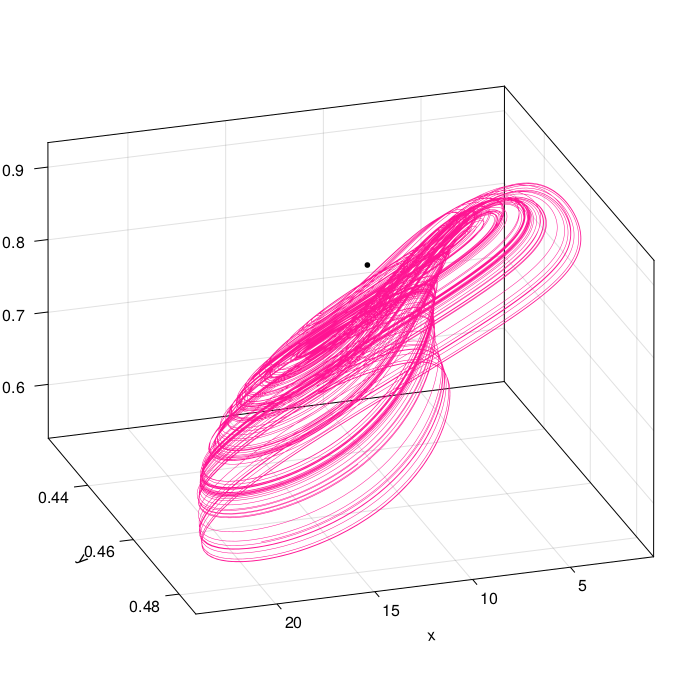

CairoMakie.Screen{IMAGE}


In [1003]:
ts, tf = 45000, 60000
idx, idy, idz = 1, 3, 2 # 3, 2, 1

CairoMakie.activate!()
f = Figure(resolution = (700, 700))
ax = Axis3(f[1, 1], azimuth = 0.4pi)#, show_axis = true)

#scale!(ax.scene, 50, 50, 1)

lines!(sol_for[idx,ts:tf], sol_for[idy,ts:tf], sol_for[idz,ts:tf],
    linewidth = 0.5, color = :deeppink)

for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], ep[idz], color = :black, markersize = 8)
end
display(f)
#display(GLMakie.Screen(), f)

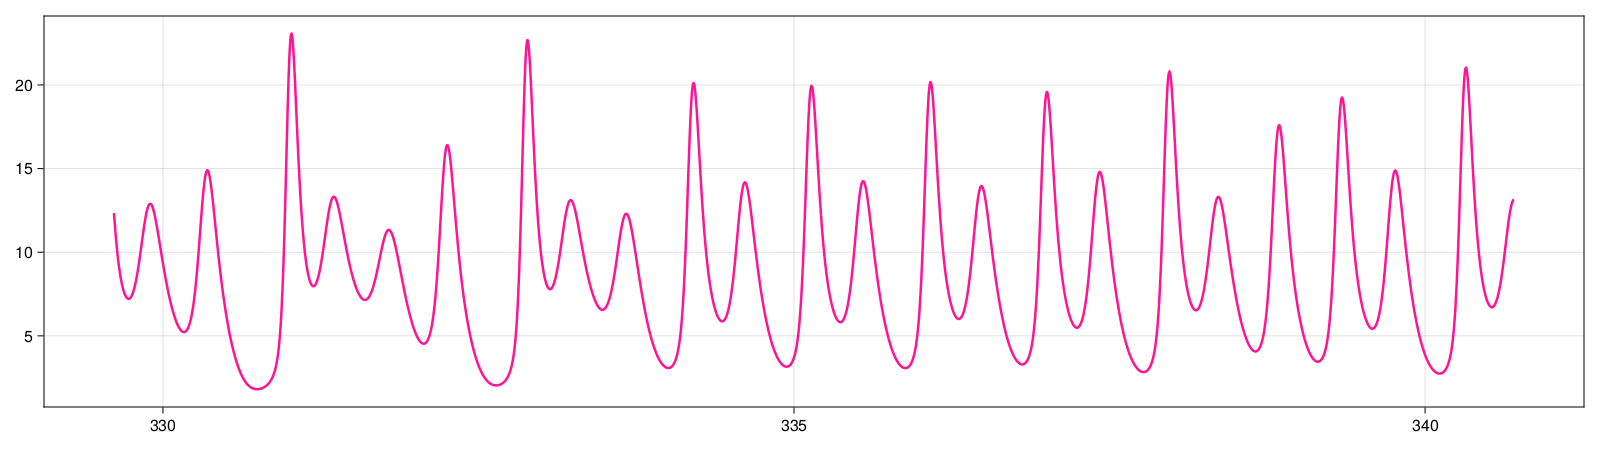

CairoMakie.Screen{IMAGE}


In [1009]:
ts, tf = 60000, 62000

CairoMakie.activate!()
f = Figure(resolution = (1600, 450))
ax = Axis(f[1, 1])

lines!(sol_for.t[ts:tf], sol_for[1,ts:tf], linewidth = 2.5, color = :deeppink)
#display(GLMakie.Screen(), f)
display(f)

In [11]:
colors = ["orange", "black", "blue"];